In [1]:
import pandas as pd
import numpy as np
from dataset_functions import *

In [3]:
from playerstats_teamheroes import *
df, target = get_dataset()
df, target = playerstats_teamheros_transform(df,target)

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243) 

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 



c:\Users\panal\VSCode\ML-Project\code\playerstats_teamheroes.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"d_{hero_id}"] = (
c:\Users\panal\VSCode\ML-Project\code\playerstats_teamheroes.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"r_{hero_id}"] = (
c:\Users\panal\VSCode\ML-Project\code\playerstats_teamheroes.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

Dataframe Shape: (32153, 463) 

NaN Count:  0 

Single Hero Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assists', 'r3_denies', 'r3_gold', 'r3_lh', 'r3_xp', 'r3_health', 'r3_max_health', 'r3_max_mana', 'r3_level', 'r3_x', 'r3_y', 'r3_stuns', 'r3_creeps_stacked', 'r3_camps_stacked', 'r3_rune_pic

In [9]:
win = target["radiant_win"].astype(int)

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(seed=10)

X_train,X_test,Y_train,Y_test = train_test_split(df,win,test_size=0.2)

In [6]:
from sklearn.ensemble import RandomForestClassifier

feature_selector = RandomForestClassifier(max_depth=10,class_weight="balanced")

feature_selector.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [7]:
from sklearn.metrics import roc_auc_score, accuracy_score

Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

feature_importance = {
    name: value 
    for name,value in zip(feature_selector.feature_names_in_,feature_selector.feature_importances_)
}

print(feature_importance)

feature_importance = dict(reversed(sorted(feature_importance.items(), key=lambda item: item[1])))
print(feature_importance)
feature_names = list(feature_importance.keys())[:10]
print(list(feature_importance.keys())[-10:])
print(feature_names)
print(list(feature_importance.keys()))
""" print(feature_importance["d_58"])
print(feature_importance["d_68"])
print(feature_importance["r_32"])
print(feature_importance["d_32"]) """
print(feature_importance["r2_y"])
print(feature_importance["d_towers_killed"])
print(feature_importance["objectives_len"])
print(feature_importance["d_teamfight_participation"])

Accouracy  0.7152853366505987
Auc 0.7131603571826053
{'game_time': np.float64(0.008471778506887245), 'objectives_len': np.float64(0.007039611985547679), 'r1_x': np.float64(0.01458643928234698), 'r1_y': np.float64(0.01841112403018238), 'r2_x': np.float64(0.015721823215382756), 'r2_y': np.float64(0.025290433578939245), 'r3_x': np.float64(0.021821149315302758), 'r3_y': np.float64(0.016193334034069272), 'r4_x': np.float64(0.0177262268452464), 'r4_y': np.float64(0.02233565079399888), 'r5_x': np.float64(0.017606431324074533), 'r5_y': np.float64(0.022208195775214358), 'd1_x': np.float64(0.02076603512563746), 'd1_y': np.float64(0.01561708580868875), 'd2_x': np.float64(0.015019867948108254), 'd2_y': np.float64(0.01601033548997048), 'd3_x': np.float64(0.015592520518044651), 'd3_y': np.float64(0.019304293115632074), 'd4_x': np.float64(0.016931200725611138), 'd4_y': np.float64(0.015366892402050218), 'd5_x': np.float64(0.014211254871837989), 'd5_y': np.float64(0.014659138148697832), 'r_kills': np.f

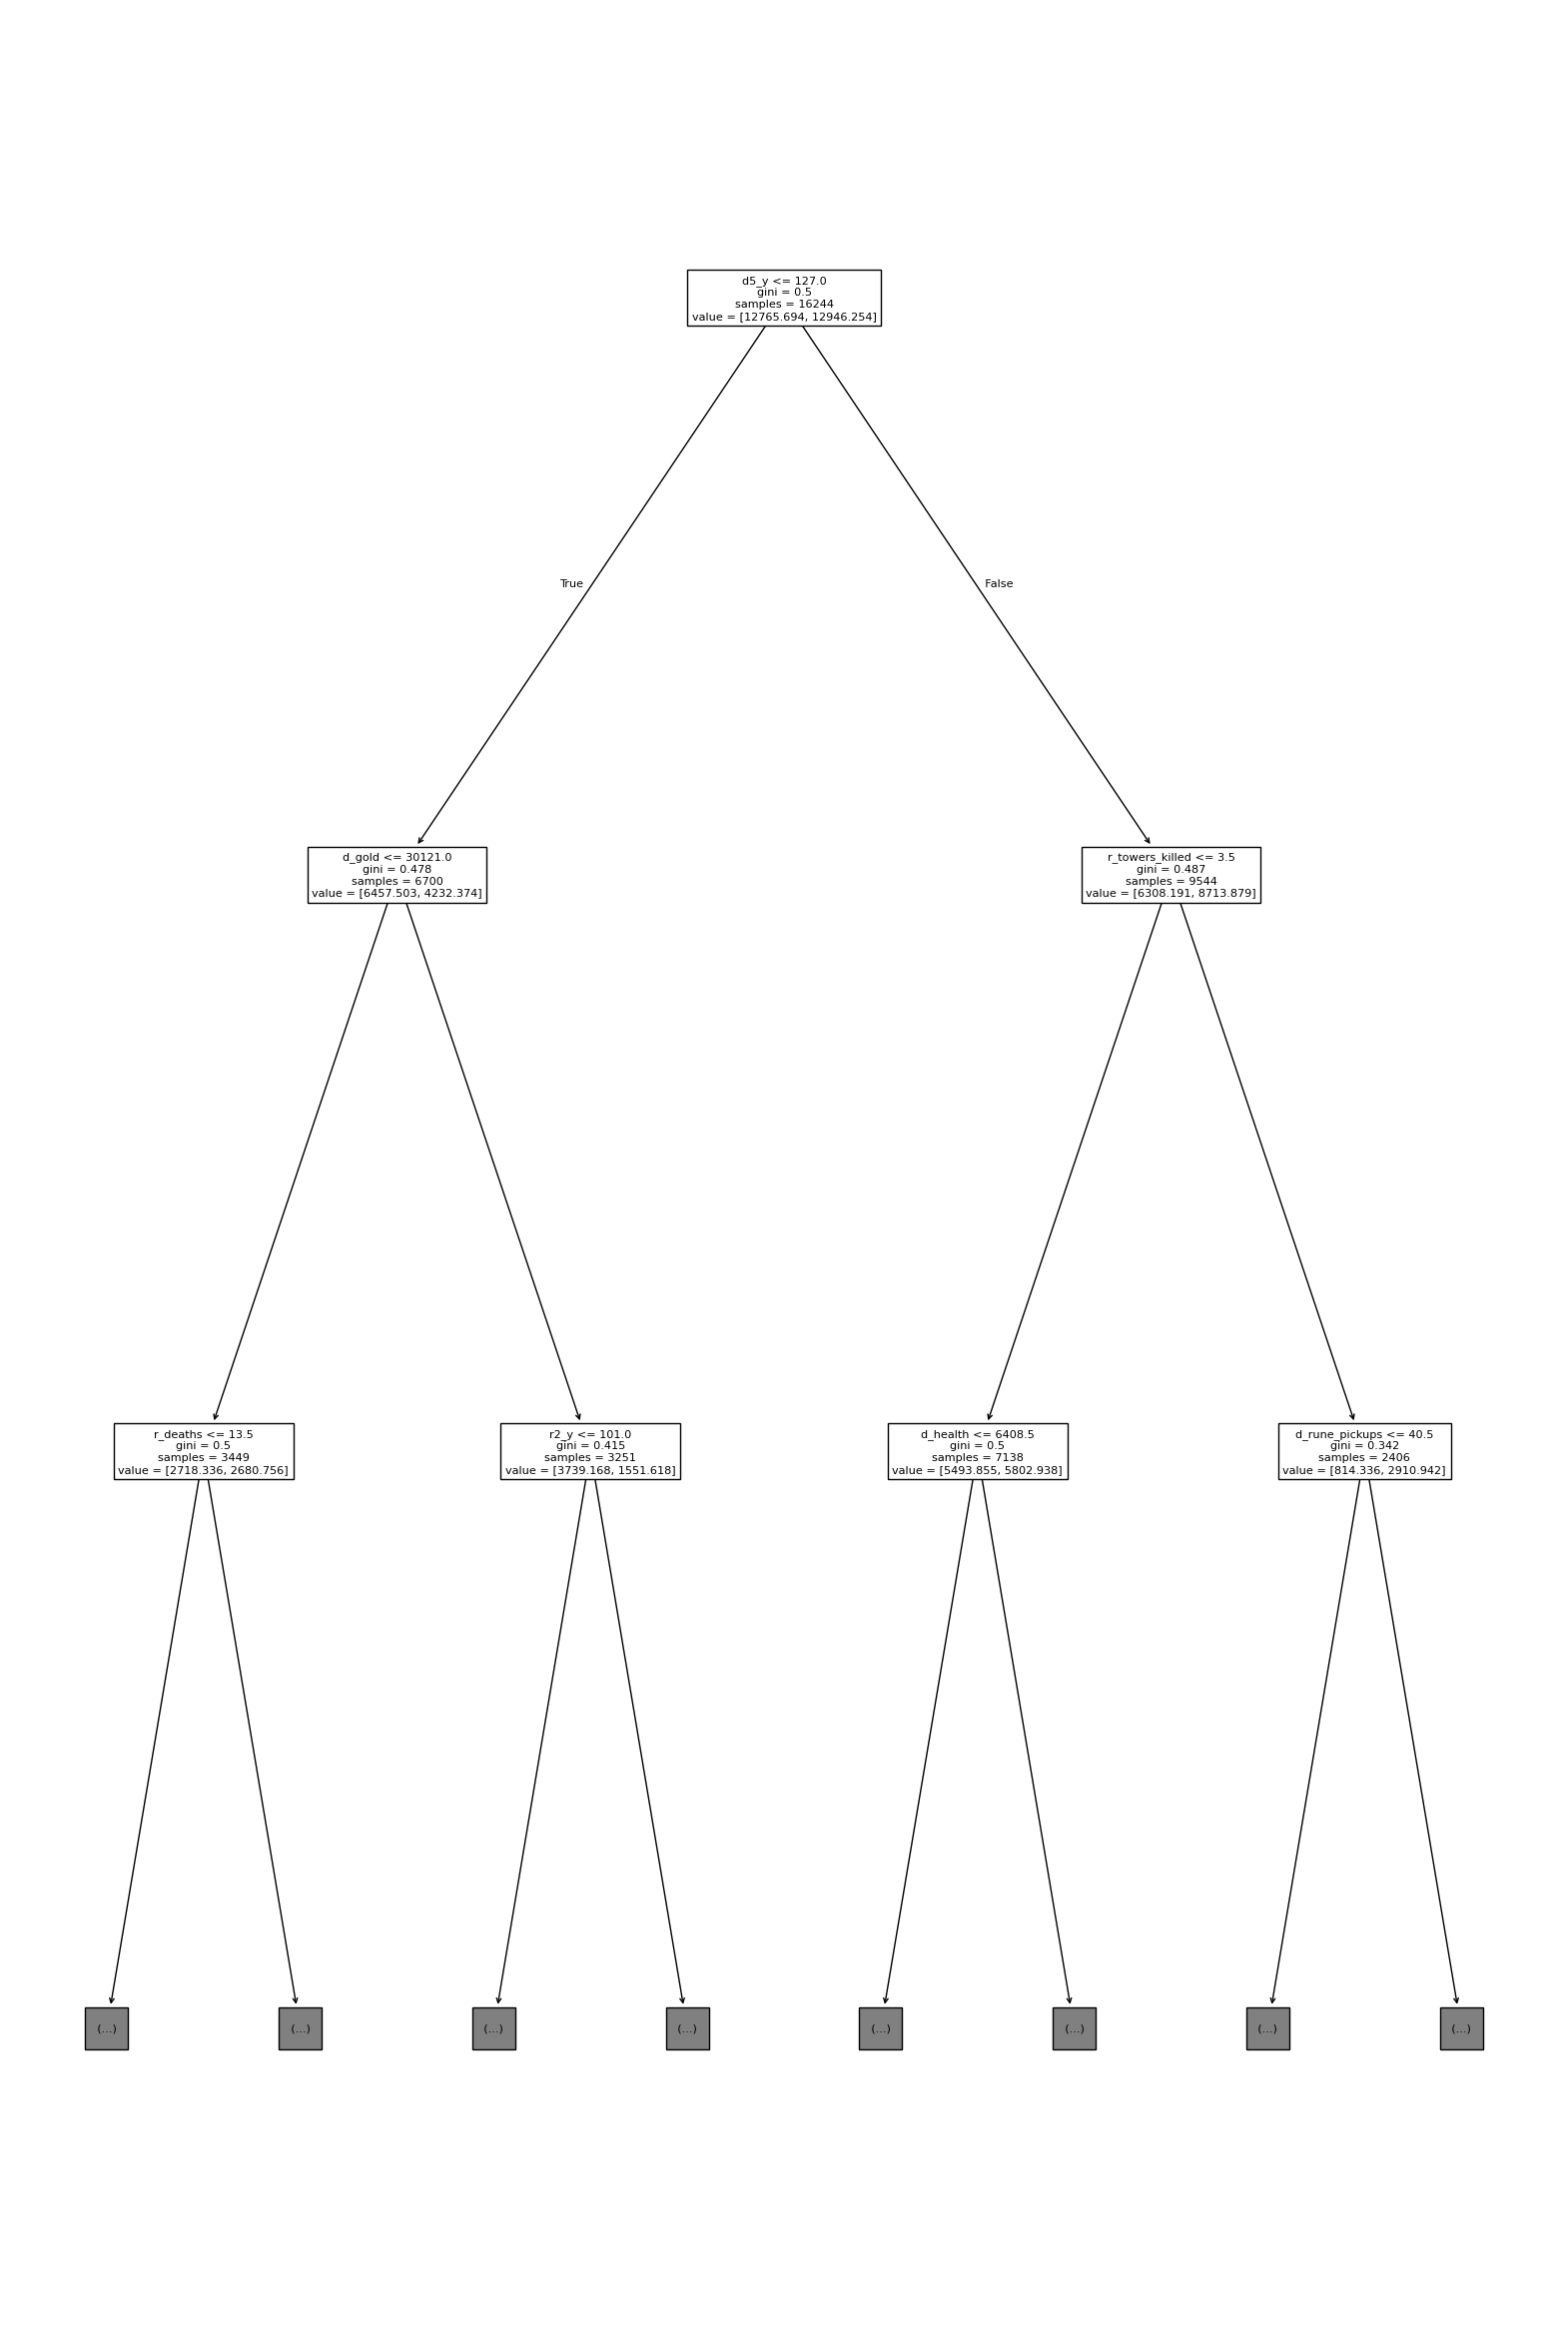

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = feature_selector.estimators_[1]

plt.figure(figsize=(20,30))
plot_tree(tree,max_depth=2,feature_names=df.columns)
plt.show()